# P01: 朝阳医院销售数据分析

本Notebook演示如何使用Pandas、NumPy、Matplotlib进行医院销售数据的完整分析流程。

**学习目标**:
- 数据加载与初步检查
- 数据清洗（缺失值、重复值、异常值）
- 探索性数据分析（EDA）
- 数据可视化
- 生成分析报告

---

## 1. 环境准备

导入必要的库并配置可视化样式。

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')

# 配置可视化样式
plt.style.use('seaborn-v0_8')
# 配置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12
sns.set_palette('Set2')


print("✅ 环境准备完成")
print(f"Pandas版本: {pd.__version__}")
print(f"NumPy版本: {np.__version__}")

✅ 环境准备完成
Pandas版本: 2.3.3
NumPy版本: 1.26.4


## 2. 数据加载

加载医院销售数据并进行初步检查。

In [6]:
# 数据文件路径
# data_path = '../../../data/stage3/hospital_sales.csv'
data_path = '../../../../data/stage3/hospital_sales.csv'

# 加载数据
df = pd.read_csv(
    data_path,
    encoding='utf-8',
    parse_dates=['order_date', 'expiry_date']
)

print(f"数据加载完成: {len(df)} 行, {len(df.columns)} 列")
print(f"数据形状: {df.shape}")

数据加载完成: 1000 行, 18 列
数据形状: (1000, 18)


### 2.1 数据基本信息

In [7]:
# 查看前5行
df.head()

,order_id,order_date,product_name,category,quantity,unit_price,total_amount,customer_type,department,doctor_name,manufacturer,batch_number,expiry_date,payment_method,discount_rate,sales_rep,region,notes
0,ORD20220817000000,2022-08-17,阿奇霉素片,抗生素,5,44.28,214.76,个人,肿瘤科,医生55,制药厂3,B2022082535,2025-07-09,医保,0.97,代表8,北京市丰台区,NaN
1,ORD20230212000001,2023-02-12,匹多莫德口服液,免疫调节药物,19,149.20,2636.36,个人,心血管科,医生44,制药厂18,B2022404527,2024-02-18,自费,0.93,代表4,北京市朝阳区,NaN
2,ORD20240106000002,2024-01-06,利巴韦林片,抗病毒药物,2,128.67,249.62,个人,心血管科,医生11,制药厂36,B2022766925,2026-07-08,商业保险,0.97,代表7,北京市朝阳区,NaN
3,ORD20230412000003,2023-04-12,右旋糖酐铁片,血液系统药物,8,147.93,1171.61,机构,呼吸科,医生82,制药厂24,B2022427065,2025-05-05,自费,0.99,代表7,北京市东城区,NaN
4,ORD20220527000004,2022-05-27,肾上腺素注射液,急救药品,8,116.15,854.86,机构,消化科,医生29,制药厂44,B2022841916,2024-06-18,医保,0.92,代表27,北京市朝阳区,NaN


In [8]:
# 数据类型和缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1000 non-null   object        
 1   order_date      1000 non-null   datetime64[ns]
 2   product_name    1000 non-null   object        
 3   category        1000 non-null   object        
 4   quantity        1000 non-null   int64         
 5   unit_price      1000 non-null   float64       
 6   total_amount    1000 non-null   float64       
 7   customer_type   1000 non-null   object        
 8   department      1000 non-null   object        
 9   doctor_name     1000 non-null   object        
 10  manufacturer    1000 non-null   object        
 11  batch_number    1000 non-null   object        
 12  expiry_date     1000 non-null   datetime64[ns]
 13  payment_method  1000 non-null   object        
 14  discount_rate   1000 non-null   float64       
 15  sales

In [9]:
# 数值型字段的统计描述
df.describe()

,order_date,quantity,unit_price,total_amount,expiry_date,discount_rate
count,1000,1000.000000,1000.000000,1000.000000,1000,1000.000000
mean,2023-07-01 06:02:52.800000,10.499000,110.707650,1110.233830,2025-07-18 00:48:57.600000256,0.949610
min,2022-01-02 00:00:00,1.000000,5.030000,12.020000,2023-02-06 00:00:00,0.900000
25%,2022-09-23 18:00:00,5.000000,42.152500,267.552500,2024-10-11 00:00:00,0.930000
50%,2023-06-26 00:00:00,10.000000,85.945000,655.920000,2025-07-27 12:00:00,0.950000
75%,2024-04-02 00:00:00,16.000000,136.112500,1407.575000,2026-04-07 18:00:00,0.970000
max,2024-12-31 00:00:00,20.000000,495.920000,8749.200000,2027-11-27 00:00:00,1.000000
std,NaN,5.841072,102.257333,1327.706154,NaN,0.028715


## 3. 数据清洗

处理缺失值、重复值和异常值，确保数据质量。

### 3.1 处理缺失值

缺失值统计:
       缺失数量  缺失比例(%)
notes   997     99.7


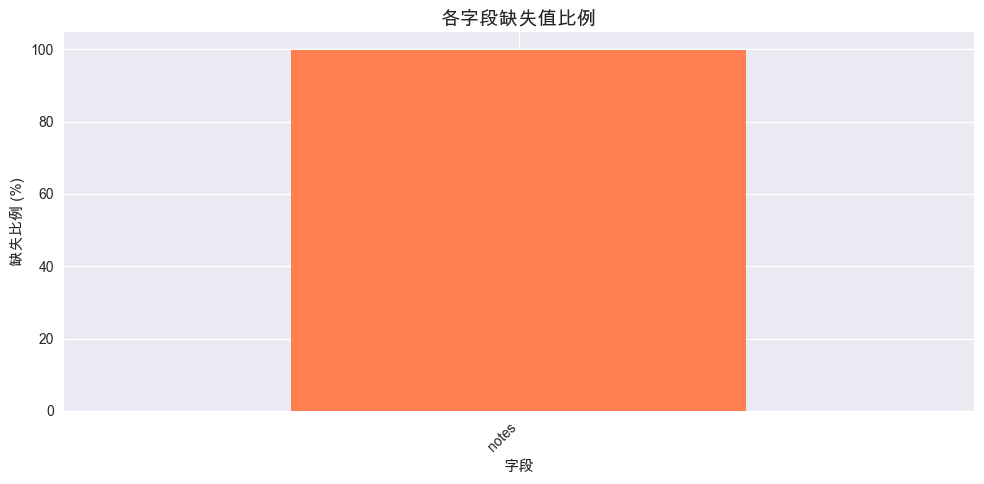

In [10]:
# 检查缺失值
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    '缺失数量': missing_counts[missing_counts > 0],
    '缺失比例(%)': missing_pct[missing_counts > 0]
})

print("缺失值统计:")
print(missing_df)

# 可视化缺失值
if len(missing_df) > 0:
    plt.figure(figsize=(10, 5))
    missing_df['缺失比例(%)'].plot(kind='bar', color='coral')
    plt.title('各字段缺失值比例', fontsize=14, fontweight='bold')
    plt.xlabel('字段')
    plt.ylabel('缺失比例 (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [11]:
# 创建清洗后的数据副本
df_clean = df.copy()

# 填充notes字段
if 'notes' in df_clean.columns:
    df_clean['notes'].fillna('无备注', inplace=True)
    print("✅ 已填充 notes 字段")

# 删除关键字段缺失的行
critical_fields = ['product_name', 'total_amount', 'order_date']
before_len = len(df_clean)
df_clean.dropna(subset=critical_fields, inplace=True)
dropped = before_len - len(df_clean)

if dropped > 0:
    print(f"✅ 删除关键字段缺失行: {dropped} 行")

print(f"\n清洗后数据: {len(df_clean)} 行")

✅ 已填充 notes 字段

清洗后数据: 1000 行


### 3.2 处理重复值

In [12]:
# 检查重复订单
duplicates = df_clean.duplicated(subset=['order_id'])
dup_count = duplicates.sum()

print(f"重复订单数: {dup_count}")

if dup_count > 0:
    # 查看重复订单示例
    print("\n重复订单示例:")
    dup_orders = df_clean[df_clean.duplicated(subset=['order_id'], keep=False)].sort_values('order_id')
    print(dup_orders[['order_id', 'order_date', 'product_name', 'total_amount']].head(10))
    
    # 删除重复
    df_clean.drop_duplicates(subset=['order_id'], keep='first', inplace=True)
    print(f"\n✅ 已删除重复订单: {dup_count} 条")
else:
    print("✅ 未发现重复订单")

print(f"\n清洗后数据: {len(df_clean)} 行")

重复订单数: 0
✅ 未发现重复订单

清洗后数据: 1000 行


### 3.3 处理异常值（IQR方法）

In [13]:
# 定义异常值检测函数
def detect_outliers_iqr(data, column, multiplier=1.5):
    """使用IQR方法检测异常值"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    return outliers, lower_bound, upper_bound

# 检测数值字段的异常值
numeric_columns = ['unit_price', 'quantity', 'total_amount']
outlier_info = {}

for col in numeric_columns:
    if col in df_clean.columns:
        outliers, lower, upper = detect_outliers_iqr(df_clean, col)
        outlier_count = outliers.sum()
        outlier_pct = (outlier_count / len(df_clean) * 100).round(2)
        
        outlier_info[col] = {
            'count': outlier_count,
            'percentage': outlier_pct,
            'lower_bound': lower,
            'upper_bound': upper
        }
        
        # 标记异常值
        df_clean[f'{col}_outlier'] = outliers
        
        print(f"{col}:")
        print(f"  异常值数量: {outlier_count} ({outlier_pct}%)")
        print(f"  正常范围: [{lower:.2f}, {upper:.2f}]")
        print()

unit_price:
  异常值数量: 88 (8.8%)
  正常范围: [-98.79, 277.05]

quantity:
  异常值数量: 0 (0.0%)
  正常范围: [-11.50, 32.50]

total_amount:
  异常值数量: 61 (6.1%)
  正常范围: [-1442.48, 3117.61]



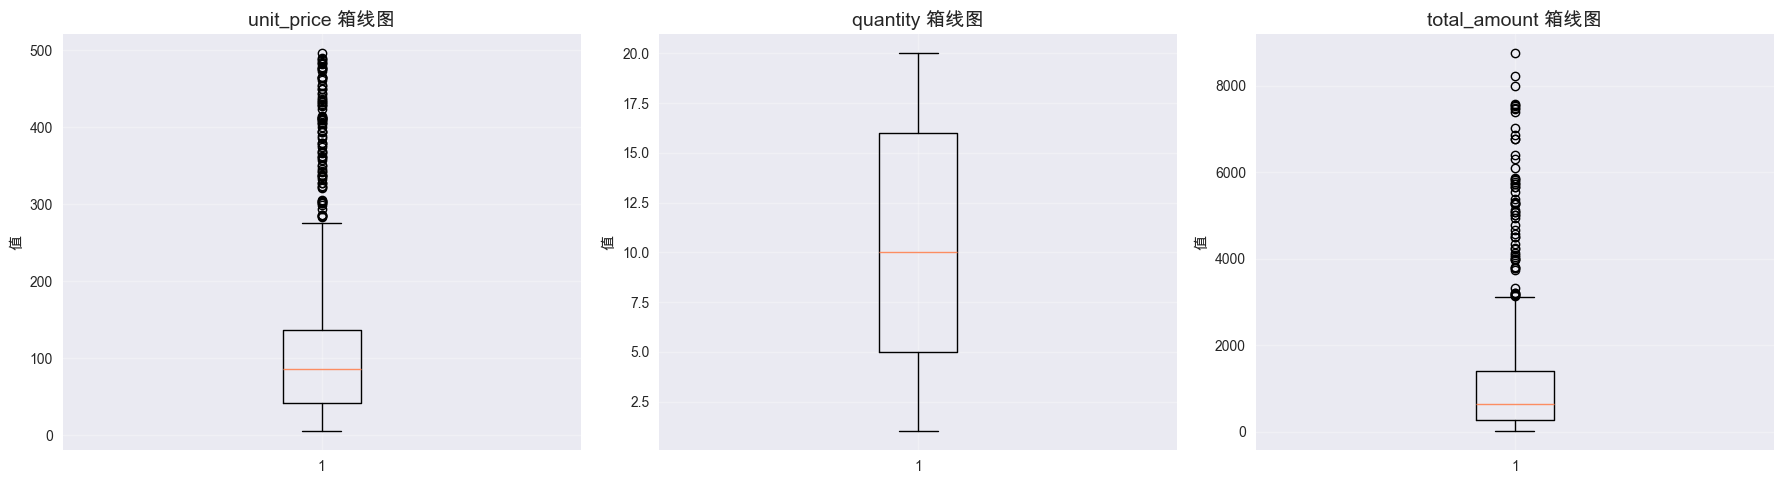

In [14]:
# 可视化异常值分布
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_columns):
    if col in df_clean.columns:
        axes[i].boxplot(df_clean[col], vert=True)
        axes[i].set_title(f'{col} 箱线图', fontsize=14, fontweight='bold')
        axes[i].set_ylabel('值')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 提取日期特征

In [15]:
# 从订单日期提取特征
df_clean['year'] = df_clean['order_date'].dt.year
df_clean['month'] = df_clean['order_date'].dt.month
df_clean['quarter'] = df_clean['order_date'].dt.quarter
df_clean['day_of_week'] = df_clean['order_date'].dt.dayofweek
df_clean['week_of_year'] = df_clean['order_date'].dt.isocalendar().week

print("✅ 已提取日期特征: year, month, quarter, day_of_week, week_of_year")
print(f"\n数据时间范围: {df_clean['order_date'].min().date()} 至 {df_clean['order_date'].max().date()}")

✅ 已提取日期特征: year, month, quarter, day_of_week, week_of_year

数据时间范围: 2022-01-02 至 2024-12-31


## 4. 探索性数据分析（EDA）

通过统计和可视化方法探索数据的特征和规律。

### 4.1 总体指标

In [16]:
# 计算总体指标
total_sales = df_clean['total_amount'].sum()
total_orders = len(df_clean)
avg_order_value = df_clean['total_amount'].mean()
avg_unit_price = df_clean['unit_price'].mean()
total_quantity = df_clean['quantity'].sum()

print("="*60)
print("总体指标")
print("="*60)
print(f"总销售额:       {total_sales:>15,.2f} 元")
print(f"总订单数:       {total_orders:>15,}")
print(f"平均订单金额:   {avg_order_value:>15,.2f} 元")
print(f"平均单价:       {avg_unit_price:>15,.2f} 元")
print(f"总销售数量:     {total_quantity:>15,}")
print("="*60)

总体指标
总销售额:          1,110,233.83 元
总订单数:                 1,000
平均订单金额:          1,110.23 元
平均单价:                110.71 元
总销售数量:              10,499


### 4.2 按类别分析

In [17]:
# 各类别销售额
category_sales = df_clean.groupby('category')['total_amount'].agg(['sum', 'count', 'mean'])
category_sales.columns = ['总销售额', '订单数', '平均订单金额']
category_sales = category_sales.sort_values('总销售额', ascending=False)
category_sales['销售额占比(%)'] = (category_sales['总销售额'] / total_sales * 100).round(2)

print("\n各类别销售情况:")
print(category_sales)


各类别销售情况:
               总销售额  订单数       平均订单金额  销售额占比(%)
category                                       
免疫调节药物    284730.85   93  3061.622043     25.65
抗肿瘤药物     176429.60   61  2892.288525     15.89
急救药品       70500.28   69  1021.743188      6.35
抗病毒药物      68463.73   58  1180.409138      6.17
内分泌药物      65267.89   72   906.498472      5.88
神经系统药物     64622.39   74   873.275541      5.82
血液系统药物     62459.92   74   844.052973      5.63
中成药        60854.24   77   790.314805      5.48
心血管药物      53305.32   63   846.116190      4.80
呼吸系统药物     49722.22   60   828.703667      4.48
镇痛药物       44736.36   55   813.388364      4.03
消化系统药物     39699.05   59   672.865254      3.58
抗生素        37430.49   58   645.353276      3.37
维生素        20065.67   74   271.157703      1.81
外用药        11945.82   53   225.392830      1.08


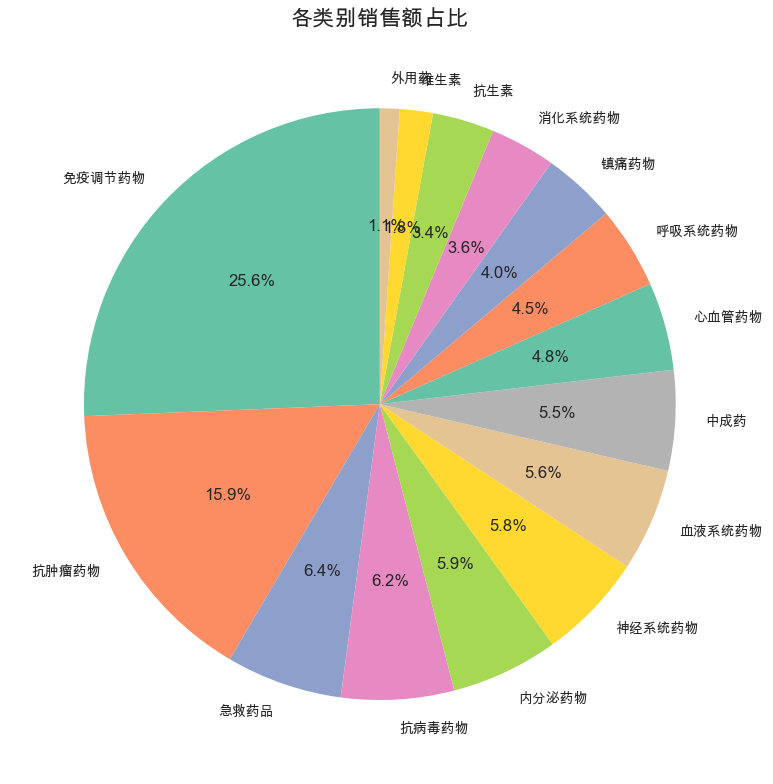

In [18]:
# 类别销售额占比饼图
plt.figure(figsize=(10, 8))
plt.pie(category_sales['总销售额'], labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('各类别销售额占比', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 4.3 时间趋势分析

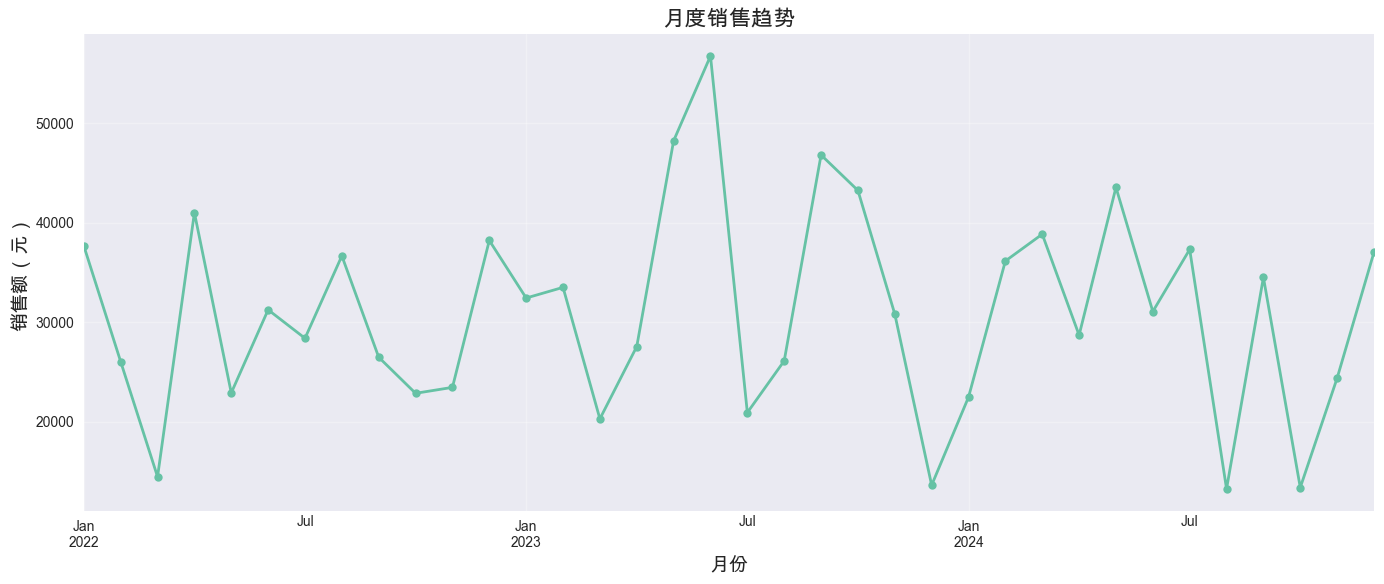


月度销售统计:
count       36.000000
mean     30839.828611
std      10357.941537
min      13227.180000
25%      23302.415000
50%      30944.105000
75%      37409.762500
max      56783.920000
Name: total_amount, dtype: float64


In [19]:
# 月度销售趋势
monthly_sales = df_clean.groupby(df_clean['order_date'].dt.to_period('M'))['total_amount'].sum()

plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('月度销售趋势', fontsize=16, fontweight='bold')
plt.xlabel('月份', fontsize=14)
plt.ylabel('销售额（元）', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n月度销售统计:")
print(monthly_sales.describe())

In [20]:
# 年度销售与增长率
yearly_sales = df_clean.groupby('year')['total_amount'].sum()
growth_rate = yearly_sales.pct_change() * 100

print("\n年度销售额:")
print(yearly_sales)

print("\n年度同比增长率:")
print(growth_rate)


年度销售额:
year
2022    349324.10
2023    400284.62
2024    360625.11
Name: total_amount, dtype: float64

年度同比增长率:
year
2022          NaN
2023    14.588321
2024    -9.907828
Name: total_amount, dtype: float64


<Figure size 1200x600 with 0 Axes>

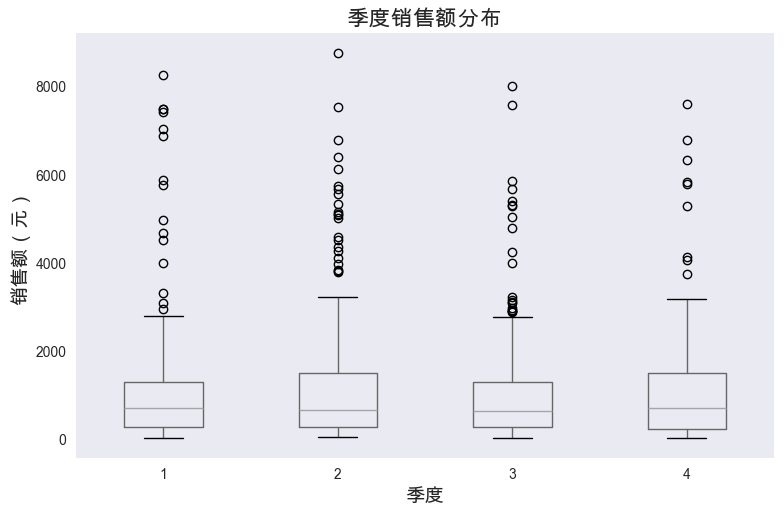

In [21]:
# 季度销售额分布
plt.figure(figsize=(12, 6))
df_clean.boxplot(column='total_amount', by='quarter', grid=False)
plt.title('季度销售额分布', fontsize=16, fontweight='bold')
plt.suptitle('')
plt.xlabel('季度', fontsize=14)
plt.ylabel('销售额（元）', fontsize=14)
plt.tight_layout()
plt.show()

### 4.4 TOP N分析


TOP 10 药品（销售额）:
 1. 匹多莫德口服液                           99,497.88 元
 2. 胸腺肽注射液                            74,745.39 元
 3. 左旋咪唑片                             63,655.48 元
 4. 伊马替尼片                             60,603.37 元
 5. 吉非替尼片                             50,003.28 元
 6. 转移因子口服液                           46,832.10 元
 7. 顺铂注射液                             36,125.02 元
 8. 紫杉醇注射液                            29,697.93 元
 9. 胰岛素注射液                            25,083.29 元
10. 肾上腺素注射液                           23,731.93 元


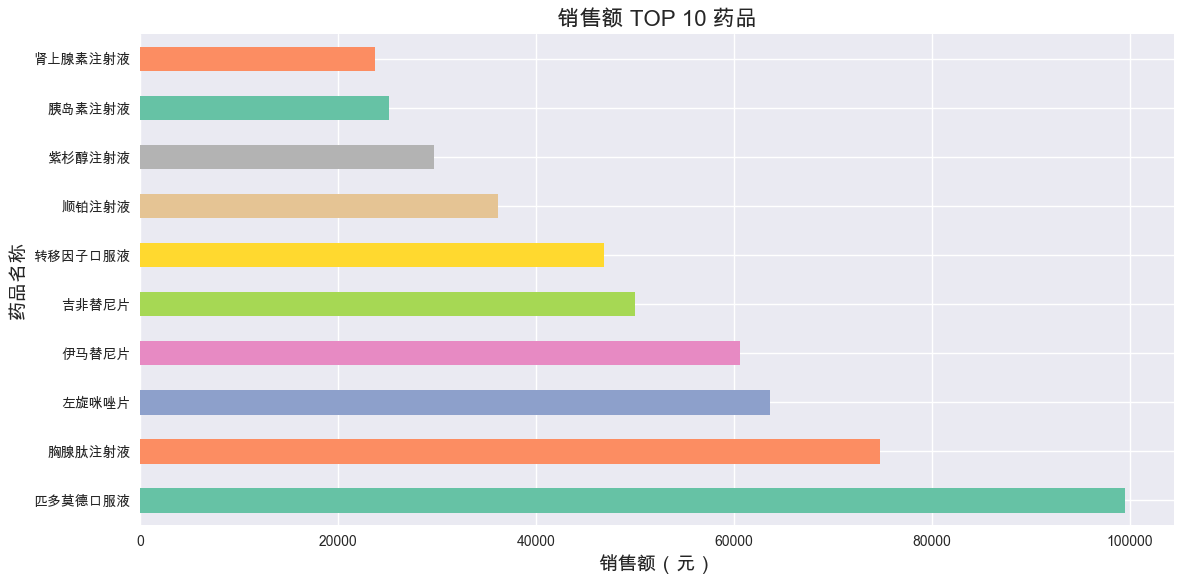

In [22]:
# TOP 10 药品（按销售额）
top10_products = df_clean.groupby('product_name')['total_amount'].sum().sort_values(ascending=False).head(10)

print("\nTOP 10 药品（销售额）:")
for i, (product, sales) in enumerate(top10_products.items(), 1):
    print(f"{i:2d}. {product:30s} {sales:>12,.2f} 元")

# 可视化
plt.figure(figsize=(12, 6))
top10_products.plot(kind='barh', color=sns.color_palette('Set2', n_colors=10))
plt.title('销售额 TOP 10 药品', fontsize=16, fontweight='bold')
plt.xlabel('销售额（元）', fontsize=14)
plt.ylabel('药品名称', fontsize=14)
plt.tight_layout()
plt.show()

In [23]:
# TOP 10 药品（按销量）
top10_volume = df_clean.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)

print("\nTOP 10 药品（销量）:")
for i, (product, qty) in enumerate(top10_volume.items(), 1):
    print(f"{i:2d}. {product:30s} {qty:>12,}")


TOP 10 药品（销量）:
 1. 匹多莫德口服液                                 349
 2. 胰岛素注射液                                  285
 3. 华法林钠片                                   283
 4. 胸腺肽注射液                                  267
 5. 伊马替尼片                                   246
 6. 板蓝根颗粒                                   239
 7. 卡马西平片                                   235
 8. 二甲双胍片                                   231
 9. 鱼肝油                                     219
10. 维生素B1片                                  217


### 4.5 客户类型分析


客户类型销售情况:
                    总销售额  订单数       平均订单金额  销售额占比(%)
customer_type                                       
个人             564911.75  503  1123.084990     50.88
机构             545322.08  497  1097.227525     49.12


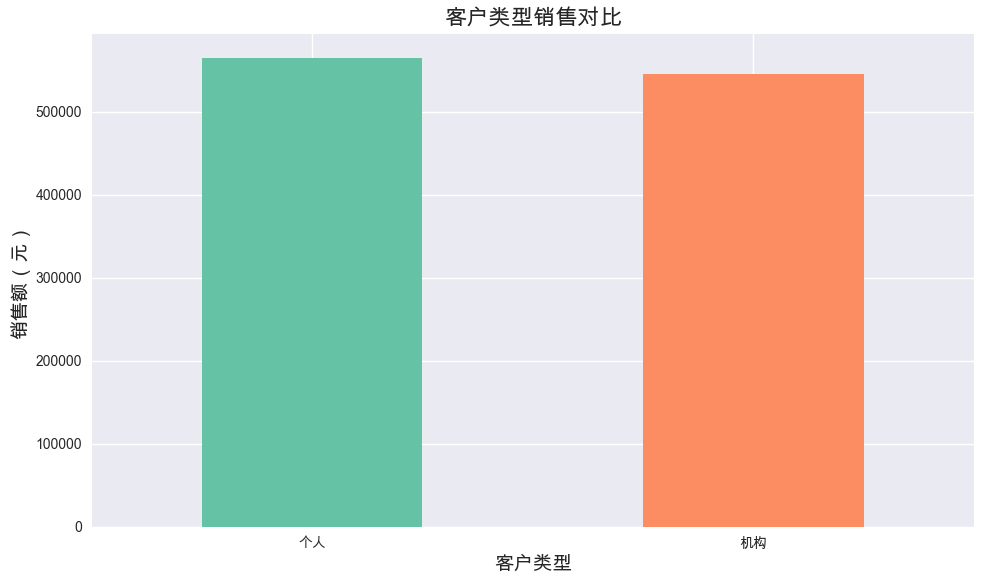

In [24]:
# 客户类型销售对比
customer_sales = df_clean.groupby('customer_type')['total_amount'].agg(['sum', 'count', 'mean'])
customer_sales.columns = ['总销售额', '订单数', '平均订单金额']
customer_sales['销售额占比(%)'] = (customer_sales['总销售额'] / total_sales * 100).round(2)

print("\n客户类型销售情况:")
print(customer_sales)

# 可视化
plt.figure(figsize=(10, 6))
customer_sales['总销售额'].plot(kind='bar', color=sns.color_palette('Set2', n_colors=len(customer_sales)))
plt.title('客户类型销售对比', fontsize=16, fontweight='bold')
plt.xlabel('客户类型', fontsize=14)
plt.ylabel('销售额（元）', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 4.6 月度-类别销售热力图

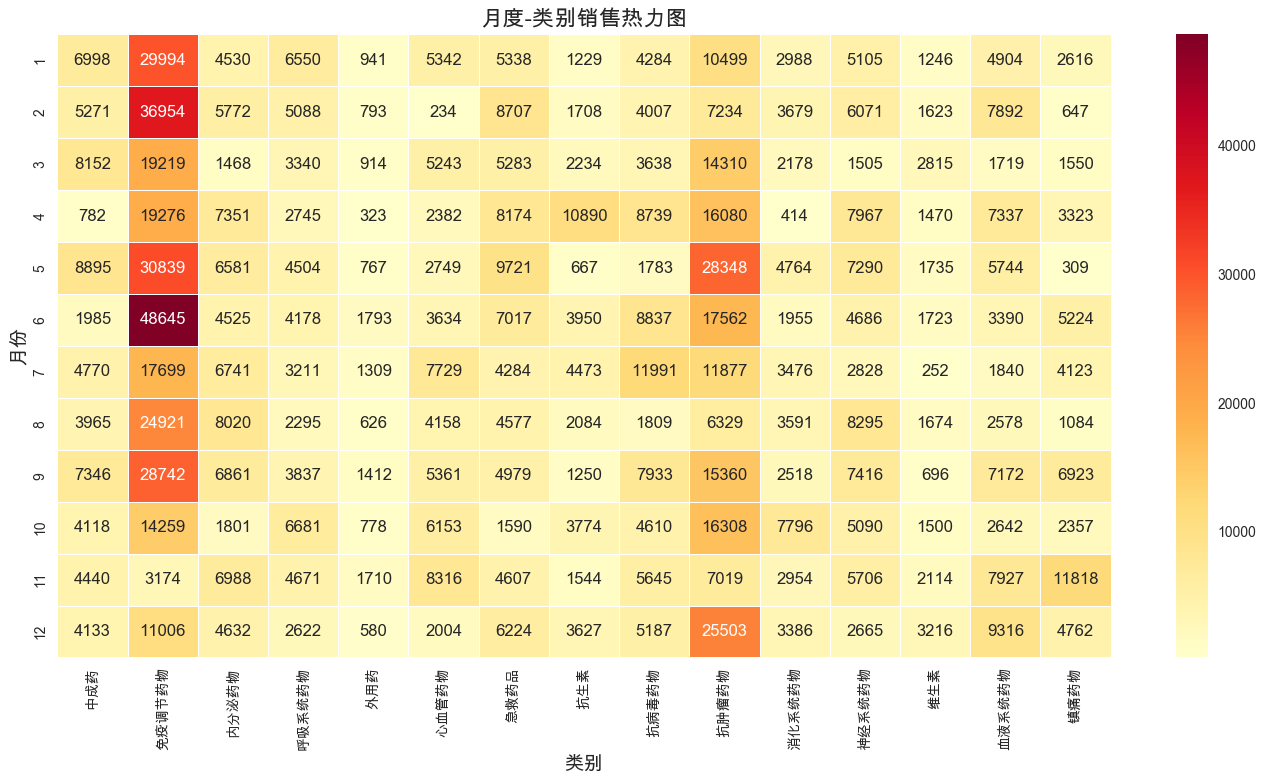

In [25]:
# 创建透视表
pivot_table = df_clean.pivot_table(
    values='total_amount',
    index='month',
    columns='category',
    aggfunc='sum'
)

# 绘制热力图
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5)
plt.title('月度-类别销售热力图', fontsize=16, fontweight='bold')
plt.xlabel('类别', fontsize=14)
plt.ylabel('月份', fontsize=14)
plt.tight_layout()
plt.show()

## 5. 分析总结

基于以上分析，我们得出以下关键发现和建议。

In [26]:
# 生成汇总报告
print("="*80)
print("朝阳医院销售数据分析报告")
print("="*80)

print("\n📊 数据概览")
print(f"  分析周期: {df_clean['order_date'].min().date()} 至 {df_clean['order_date'].max().date()}")
print(f"  订单总数: {total_orders:,}")
print(f"  总销售额: {total_sales:,.2f} 元")
print(f"  平均订单金额: {avg_order_value:.2f} 元")

print("\n🔍 主要发现")
print(f"  1. 销售额最高的类别: {category_sales.index[0]} ({category_sales.iloc[0]['总销售额']:,.2f}元)")
print(f"  2. 畅销药品TOP3:")
for i, (product, sales) in enumerate(top10_products.head(3).items(), 1):
    print(f"     {i}. {product}: {sales:,.2f} 元")

if len(yearly_sales) > 1:
    print(f"  3. 年度同比增长率: {growth_rate.iloc[-1]:.2f}%")

print("\n💡 建议")
print("  库存管理:")
print("    - 加强畅销药品（TOP10）的库存管理，避免缺货")
print("    - 关注销售额占比低的类别，考虑促销或调整采购策略")
print("\n  销售策略:")
print("    - 根据月度趋势优化营销活动时间")
print("    - 针对不同客户类型定制差异化服务方案")
print("\n  运营优化:")
print("    - 分析季节性趋势，提前备货")
print("    - 识别异常订单，优化风控机制")

print("\n" + "="*80)
print("✅ 分析完成！")
print("="*80)

朝阳医院销售数据分析报告

📊 数据概览
  分析周期: 2022-01-02 至 2024-12-31
  订单总数: 1,000
  总销售额: 1,110,233.83 元
  平均订单金额: 1110.23 元

🔍 主要发现
  1. 销售额最高的类别: 免疫调节药物 (284,730.85元)
  2. 畅销药品TOP3:
     1. 匹多莫德口服液: 99,497.88 元
     2. 胸腺肽注射液: 74,745.39 元
     3. 左旋咪唑片: 63,655.48 元
  3. 年度同比增长率: -9.91%

💡 建议
  库存管理:
    - 加强畅销药品（TOP10）的库存管理，避免缺货
    - 关注销售额占比低的类别，考虑促销或调整采购策略

  销售策略:
    - 根据月度趋势优化营销活动时间
    - 针对不同客户类型定制差异化服务方案

  运营优化:
    - 分析季节性趋势，提前备货
    - 识别异常订单，优化风控机制

✅ 分析完成！


## 6. 数据导出（可选）

导出清洗后的数据以供后续使用。

In [27]:
# 创建输出目录
output_dir = Path('../outputs/processed_data')
output_dir.mkdir(parents=True, exist_ok=True)

# 保存为CSV
csv_path = output_dir / 'cleaned_data.csv'
df_clean.to_csv(csv_path, index=False, encoding='utf-8')
print(f"✅ 清洗后数据已保存: {csv_path}")

# 保存为Parquet（更高效）
try:
    parquet_path = output_dir / 'cleaned_data.parquet'
    df_clean.to_parquet(parquet_path, index=False)
    print(f"✅ Parquet格式已保存: {parquet_path}")
except Exception as e:
    print(f"⚠️  Parquet保存失败: {e}")

✅ 清洗后数据已保存: ../outputs/processed_data/cleaned_data.csv
⚠️  Parquet保存失败: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.


---

## 💡 扩展练习

完成基础分析后，可以尝试以下进阶任务：

1. **时间序列预测**: 使用Prophet或ARIMA预测未来销售趋势
2. **客户细分**: 基于RFM模型分析客户价值
3. **关联规则**: 使用Apriori算法发现药品关联销售模式
4. **异常检测**: 识别异常订单和销售行为
5. **交互式仪表盘**: 使用Plotly Dash创建动态仪表盘

---

**项目完成时间**: 预计2-4小时  
**难度等级**: ⭐⭐ 入门  
**前置知识**: Pandas基础、Matplotlib基础

**下一个项目**: [P02 - 电商用户画像](../../p02-ecommerce/)